<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    total = np.zeros_like(V[0])
    for i in range(len(X)):
        result = np.zeros_like(V[i])
        for row in range(X[i].shape[0]):
            for col in range(X[i].shape[1]):
                result[row, 0] += X[i][row, col] * V[i][col, 0]
        total += result
    return total

def test_sum_prod():
    X = [
        np.array([[1, 2], [3, 4]]),
        np.array([[5, 6], [7, 8]])
    ]
    V = [
        np.array([[1], [2]]),
        np.array([[3], [4]])
    ]
    
    result = sum_prod(X, V)
    expected = np.array([[1*1+2*2 + 5*3+6*4], [3*1+4*2 + 7*3+8*4]])
    assert np.array_equal(result, expected)
    
    X = [np.array([[2, 0], [0, 2]])]
    V = [np.array([[1], [1]])]
    
    result = sum_prod(X, V)
    expected = np.array([[2], [2]])
    assert np.array_equal(result, expected)
    
    X = [np.eye(3)]
    V = [np.array([[1], [2], [3]])]
    
    result = sum_prod(X, V)
    expected = np.array([[1], [2], [3]])
    assert np.array_equal(result, expected)
    
    X = [np.zeros((2, 2)), np.zeros((2, 2))]
    V = [np.array([[1], [1]]), np.array([[2], [2]])]
    
    result = sum_prod(X, V)
    expected = np.array([[0], [0]])
    assert np.array_equal(result, expected)
    
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[0], [0]]), np.array([[0], [0]])]
    
    result = sum_prod(X, V)
    expected = np.array([[0], [0]])
    assert np.array_equal(result, expected)
    
    X = [
        np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
        np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])
    ]
    V = [
        np.array([[1], [2], [3]]),
        np.array([[4], [5], [6]])
    ]
    
    result = sum_prod(X, V)
    expected = np.array([[1*1+0*2+0*3 + 2*4+0*5+0*6], 
                         [0*1+1*2+0*3 + 0*4+2*5+0*6], 
                         [0*1+0*2+1*3 + 0*4+0*5+2*6]])
    assert np.array_equal(result, expected)
    
    print("Все тесты пройдены успешно!")

test_sum_prod()

Все тесты пройдены успешно!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    # Тест 1: базовый случай с плавающей точкой, порог по умолчанию
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    expected1 = np.array([[0, 1], [0, 1]])
    result1 = binarize(M1)
    assert np.array_equal(result1, expected1)
    # Тест 2: пользовательский порог
    M2 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
    expected2 = np.array([[0, 0, 0], [1, 1, 1]])
    result2 = binarize(M2, 0.3)
    assert np.array_equal(result2, expected2)

    # Тест 3: целочисленная матрица
    M3 = np.array([[1, 2], [3, 4]])
    expected3 = np.array([[0, 0], [1, 1]])
    result3 = binarize(M3, 2.5)
    assert np.array_equal(result3, expected3)

    # Тест 4: все значения ниже порога
    M4 = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected4 = np.array([[0, 0], [0, 0]])
    result4 = binarize(M4, 0.5)
    assert np.array_equal(result4, expected4)

    # Тест 5: все значения выше порога
    M5 = np.array([[0.6, 0.7], [0.8, 0.9]])
    expected5 = np.array([[1, 1], [1, 1]])
    result5 = binarize(M5, 0.5)
    assert np.array_equal(result5, expected5)

    # Тест 6: граничное значение (строгое неравенство)
    M6 = np.array([[0.5, 0.5], [0.5, 0.5]])
    expected6 = np.array([[0, 0], [0, 0]])
    result6 = binarize(M6, 0.5)
    assert np.array_equal(result6, expected6)

    print("Все тесты пройдены успешно!")

test_binarize()

Все тесты пройдены успешно!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
import numpy as np

def unique_rows(mat):
    unique_per_row = []
    for i in range(mat.shape[0]):
        row_unique = np.unique(mat[i, :])
        unique_per_row.append(row_unique.tolist())
    return unique_per_row

def unique_columns(mat):
    unique_per_col = []
    for j in range(mat.shape[1]):
        col_unique = np.unique(mat[:, j])
        unique_per_col.append(col_unique.tolist())
    return unique_per_col

def test_unique_rows_columns():
    mat1 = np.array([[1, 2, 1],
                     [3, 3, 3],
                     [2, 1, 3]])
    
    result_rows1 = unique_rows(mat1)
    expected_rows1 = [[1, 2], [3], [1, 2, 3]]
    assert result_rows1 == expected_rows1
    
    result_cols1 = unique_columns(mat1)
    expected_cols1 = [[1, 2, 3], [1, 2, 3], [1, 3]]
    assert result_cols1 == expected_cols1

    mat2 = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
    
    result_rows2 = unique_rows(mat2)
    expected_rows2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    assert result_rows2 == expected_rows2
    
    result_cols2 = unique_columns(mat2)
    expected_cols2 = [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
    assert result_cols2 == expected_cols2

    mat3 = np.array([[5]])
    
    result_rows3 = unique_rows(mat3)
    expected_rows3 = [[5]]
    assert result_rows3 == expected_rows3
    
    result_cols3 = unique_columns(mat3)
    expected_cols3 = [[5]]
    assert result_cols3 == expected_cols3

    mat4 = np.array([[1, -1, 0],
                     [1, 2, -1],
                     [0, 2, 3]])
    
    result_rows4 = unique_rows(mat4)
    expected_rows4 = [[-1, 0, 1], [-1, 1, 2], [0, 2, 3]]
    assert result_rows4 == expected_rows4
    
    result_cols4 = unique_columns(mat4)
    expected_cols4 = [[0, 1], [-1, 2], [-1, 0, 3]]
    assert result_cols4 == expected_cols4

    print("Все тесты пройдены успешно!")

test_unique_rows_columns()

Все тесты пройдены успешно!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

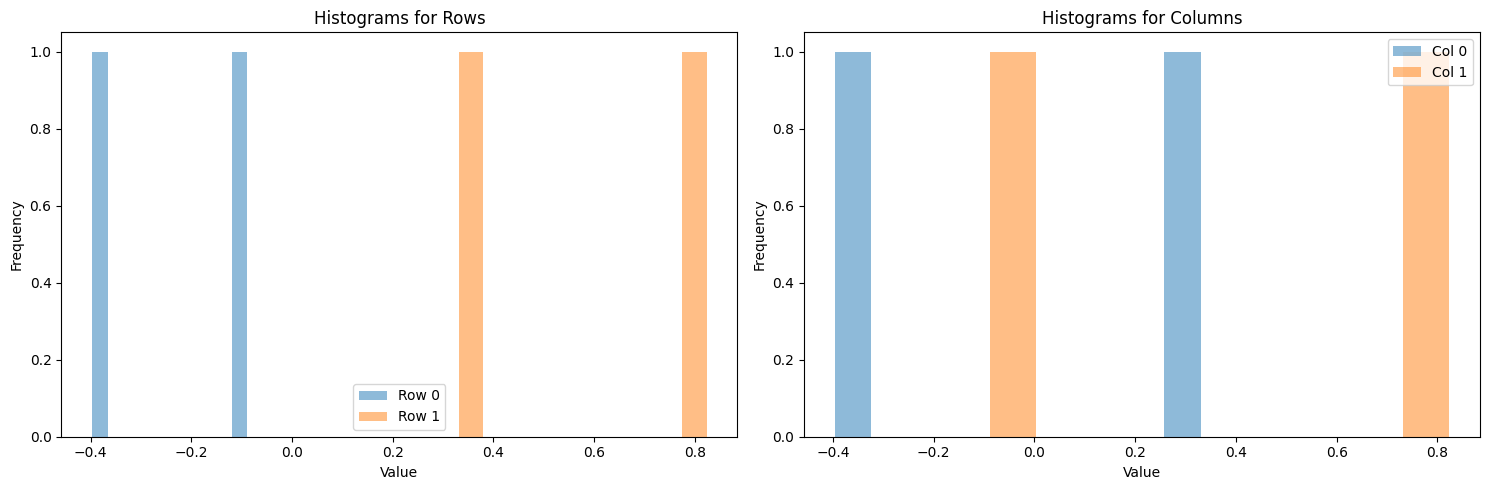

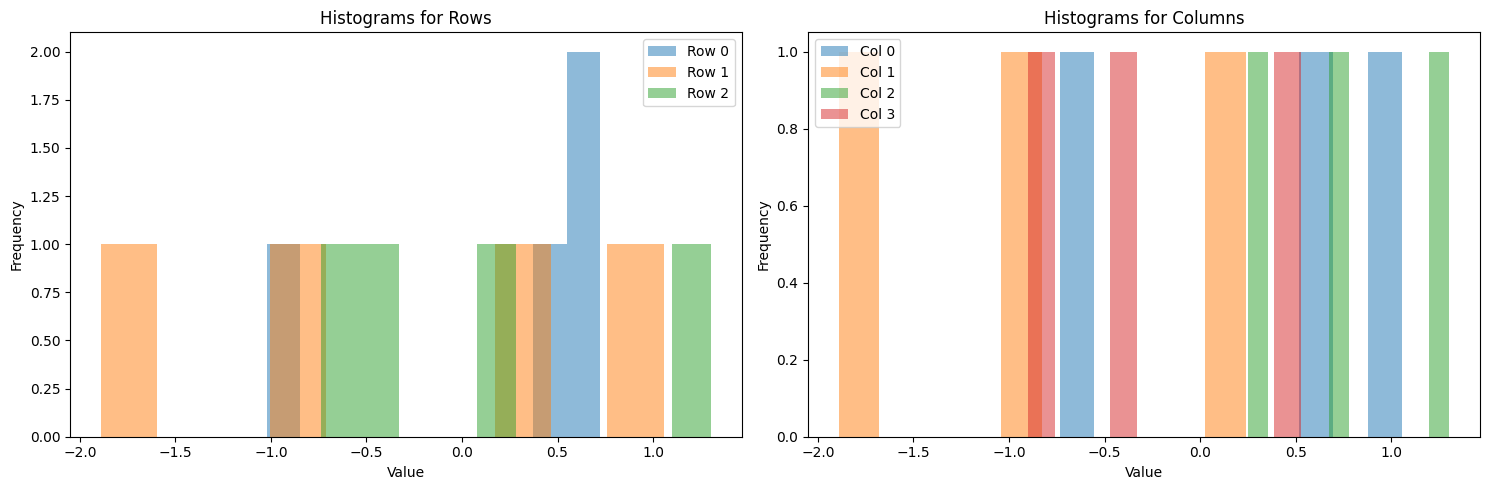

Все тесты пройдены успешно!


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_stats_and_histograms(m, n):
    matrix = np.random.normal(0, 1, (m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    for i in range(m):
        plt.hist(matrix[i, :], alpha=0.5, label=f'Row {i}')
    plt.title('Histograms for Rows')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for j in range(n):
        plt.hist(matrix[:, j], alpha=0.5, label=f'Col {j}')
    plt.title('Histograms for Columns')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'matrix': matrix,
        'row_means': row_means,
        'row_variances': row_variances,
        'col_means': col_means,
        'col_variances': col_variances
    }

def test_matrix_stats_and_histograms():
    # Тест 1: маленькая матрица 2x2
    result = matrix_stats_and_histograms(2, 2)
    
    assert result['matrix'].shape == (2, 2)
    assert result['row_means'].shape == (2,)
    assert result['row_variances'].shape == (2,)
    assert result['col_means'].shape == (2,)
    assert result['col_variances'].shape == (2,)
    
    # Тест 2: матрица 3x4
    result = matrix_stats_and_histograms(3, 4)
    
    assert result['matrix'].shape == (3, 4)
    assert result['row_means'].shape == (3,)
    assert result['row_variances'].shape == (3,)
    assert result['col_means'].shape == (4,)
    assert result['col_variances'].shape == (4,)
    
    # Тест 3: проверка вычисления среднего для строк
    test_matrix = np.array([[1, 2], [3, 4]])
    row_means = np.mean(test_matrix, axis=1)
    expected_means = np.array([1.5, 3.5])
    assert np.allclose(row_means, expected_means)
    
    # Тест 4: проверка вычисления дисперсии для столбцов
    col_variances = np.var(test_matrix, axis=0)
    expected_variances = np.array([1.0, 1.0])
    assert np.allclose(col_variances, expected_variances)
    
    print("Все тесты пройдены успешно!")

test_matrix_stats_and_histograms()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
import numpy as np

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chess():
    # Тест 1: матрица 2x2
    result1 = chess(2, 2, 0, 1)
    expected1 = np.array([[0, 1], [1, 0]])
    assert np.array_equal(result1, expected1)

    # Тест 2: матрица 3x3
    result2 = chess(3, 3, 'A', 'B')
    expected2 = np.array([['A', 'B', 'A'],
                         ['B', 'A', 'B'],
                         ['A', 'B', 'A']])
    assert np.array_equal(result2, expected2)

    # Тест 3: матрица 1x1
    result3 = chess(1, 1, 5, 10)
    expected3 = np.array([[5]])
    assert np.array_equal(result3, expected3)

    # Тест 4: матрица 2x3
    result4 = chess(2, 3, 1.5, 2.5)
    expected4 = np.array([[1.5, 2.5, 1.5],
                         [2.5, 1.5, 2.5]])
    assert np.array_equal(result4, expected4)

    # Тест 5: матрица 4x1
    result5 = chess(4, 1, True, False)
    expected5 = np.array([[True], [False], [True], [False]])
    assert np.array_equal(result5, expected5)

    print("Все тесты пройдены успешно!")

test_chess()

Все тесты пройдены успешно!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    center_x, center_y = n // 2, m // 2
    
    x_start = max(0, center_x - a // 2)
    x_end = min(n, center_x + a // 2)
    y_start = max(0, center_y - b // 2)
    y_end = min(m, center_y + b // 2)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    center_x, center_y = n // 2, m // 2
    y, x = np.ogrid[:m, :n]
    mask = ((x - center_x) ** 2 / a ** 2 + (y - center_y) ** 2 / b ** 2) <= 1
    image[mask] = ellipse_color
    return image

def test_draw_shapes():
    rect1 = draw_rectangle(4, 6, 10, 10, [255, 0, 0], [0, 0, 0])
    assert rect1.shape == (10, 10, 3)
    assert np.all(rect1[2:8, 3:7] == [255, 0, 0])
    
    ellipse1 = draw_ellipse(4, 3, 10, 10, [0, 255, 0], [0, 0, 0])
    assert ellipse1.shape == (10, 10, 3)
    
    rect2 = draw_rectangle(20, 20, 10, 10, [255, 0, 0], [0, 0, 0])
    assert rect2.shape == (10, 10, 3)
    assert np.all(rect2 == [255, 0, 0])
    
    ellipse2 = draw_ellipse(10, 10, 5, 5, [0, 0, 255], [255, 255, 255])
    assert ellipse2.shape == (5, 5, 3)
    
    rect3 = draw_rectangle(2, 2, 5, 5, [255, 0, 0], [0, 0, 255])
    assert np.array_equal(rect3[0, 0], [0, 0, 255])
    
    print("Все тесты пройдены успешно!")

test_draw_shapes()

Все тесты пройдены успешно!


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [17]:
import numpy as np

def time_series_analysis(series, window_size):
    series = np.array(series)
    
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)
    
    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)
    
    moving_avg = []
    for i in range(len(series) - window_size + 1):
        window = series[i:i + window_size]
        moving_avg.append(np.mean(window))
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'moving_average': moving_avg
    }

def test_time_series_analysis():
    series1 = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2]
    result1 = time_series_analysis(series1, 3)
    
    assert abs(result1['mean'] - 2.3) < 0.01
    assert abs(result1['variance'] - 0.81) < 0.01
    assert abs(result1['std'] - 0.9) < 0.01
    assert result1['local_maxima'] == [2, 7]
    assert result1['local_minima'] == [4]
    
    series2 = [5, 5, 5, 5, 5]
    result2 = time_series_analysis(series2, 2)
    
    assert result2['mean'] == 5
    assert result2['variance'] == 0
    assert result2['std'] == 0
    assert result2['local_maxima'] == []
    assert result2['local_minima'] == []
    
    series3 = [1, 2, 3, 4, 5]
    result3 = time_series_analysis(series3, 3)
    
    expected_ma = [2, 3, 4]
    assert np.allclose(result3['moving_average'], expected_ma)
    
    series4 = [10, 20]
    result4 = time_series_analysis(series4, 2)
    
    assert result4['local_maxima'] == []
    assert result4['local_minima'] == []
    assert result4['moving_average'] == [15]
    
    print("Все тесты пройдены успешно!")

test_time_series_analysis()

Все тесты пройдены успешно!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [18]:
import numpy as np

def one_hot_encoding(labels):
    n = len(labels)
    num_classes = max(labels) + 1
    encoding = np.zeros((n, num_classes), dtype=int)
    
    for i, label in enumerate(labels):
        encoding[i, label] = 1
    
    return encoding

def test_one_hot_encoding():
    labels1 = [0, 2, 3, 0]
    result1 = one_hot_encoding(labels1)
    expected1 = np.array([[1, 0, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1],
                         [1, 0, 0, 0]])
    assert np.array_equal(result1, expected1)
    
    labels2 = [1, 1, 1]
    result2 = one_hot_encoding(labels2)
    expected2 = np.array([[0, 1],
                         [0, 1],
                         [0, 1]])
    assert np.array_equal(result2, expected2)
    
    labels3 = [0, 1, 2, 3, 4]
    result3 = one_hot_encoding(labels3)
    expected3 = np.array([[1, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 1, 0],
                         [0, 0, 0, 0, 1]])
    assert np.array_equal(result3, expected3)
    
    labels4 = [0]
    result4 = one_hot_encoding(labels4)
    expected4 = np.array([[1]])
    assert np.array_equal(result4, expected4)
    
    print("Все тесты пройдены успешно!")

test_one_hot_encoding()

Все тесты пройдены успешно!
